# Video Game Sales Prediction and Classification

# Project Description:

As an intern at Acme Software Lab in data science team, we are tasked with analyzing a video game sales dataset and performing various predictive modeling and classification tasks. The dataset contains information about video game sales worldwide, including factors such as critic and user reviews, genre, platform, and more. Your goal will be to predict the sales performance of video games worldwide, classify and cluster video games based on categorical variables, and answer specific questions related to the dataset. This project will involve data preprocessing, exploratory data analysis (EDA), model development, deployment, and hosting on Streamlit.

Dataset Link: https://www.kaggle.com/datasets/ibriiee/video-games-sales-dataset-2022-updated-extra-feat


## Dataset description

This dataset is publicly available and free to use on Kaggle.

Attribute Information:
1. Name
2. Platform
3. Year
4. Genre
5. Publisher
6. NA_Sales
7. EU_Sales
8. JP_Sales
9. Other_Sales
10. Global_Sales
11. Critic_Score
12. Critic_Count
13. User_Score
14. User_Count
15. Developer
16. Rating

## 	Data Cleaning and Preprocessing

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import pandas as pd
# importing the data

#path = "/content/drive/MyDrive/ACME Internship/Video_Games.csv"
path = "Video_Games.csv"
dataset = pd.read_csv(path)
# get the first 5 rows
dataset.head()

dataset

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#this returns the data types of each column
dataset.columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
#checking if there are missing value
missing_values_count = dataset.isnull().sum()
missing_values_count

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

We have lot of missing values so we can't drop them, as if we do so our dataset will be little.

In [6]:
# Check for duplicates in the dataset
dataset.duplicated().sum()

0

they is no need of removing duplicate rows as there are no duplicate.

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset into a DataFrame
dataset = pd.read_csv(path)

# Handle missing values for numerical columns
num_cols = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Count']
num_imputer = SimpleImputer(strategy='mean')
dataset[num_cols] = num_imputer.fit_transform(dataset[num_cols])

# Handle missing values for 'User_Score' separately
# First, we replace 'tbd' values with NaN
dataset['User_Score'] = pd.to_numeric(dataset['User_Score'], errors='coerce')
# Then, impute missing values with the mean
dataset['User_Score'] = num_imputer.fit_transform(dataset[['User_Score']])

# Handle missing values for categorical columns
cat_cols = ['Genre', 'Publisher', 'Developer', 'Rating']
cat_imputer = SimpleImputer(strategy='most_frequent')
dataset[cat_cols] = cat_imputer.fit_transform(dataset[cat_cols])

# Display the entire cleaned dataset
display(dataset)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,7.125046,162.229908,Ubisoft,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,7.125046,162.229908,Ubisoft,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,162.229908,Ubisoft,E
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,68.967679,26.360821,7.125046,162.229908,Ubisoft,E
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,162.229908,Ubisoft,E
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,68.967679,26.360821,7.125046,162.229908,Ubisoft,E


In [8]:
#checking if there are missing value
missing_values_count = dataset.isnull().sum()
missing_values_count

Name               2
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

We still have 2 missing values for the column name which can be dropped.

In [9]:
dataset = dataset.dropna(subset=['Name'])
missing_values_count

Name               2
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

after that we don't have have any missing data in our dataset.

## Exploratory Data Analysis (EDA)

### Summary statistics

In [10]:
#this will provides a summary statistics of the numerical columns
dataset.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000
mean,2006.488969,0.263255,0.145010,0.077610,0.047333,0.533462,68.967679,26.360821,7.125046,162.229908
std,5.829987,0.813475,0.503303,0.308836,0.186721,1.547956,9.723998,13.241794,1.010693,378.187754
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,68.967679,22.000000,7.125046,30.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,68.967679,26.360821,7.125046,162.229908
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,26.360821,7.300000,162.229908
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


### Visualisation

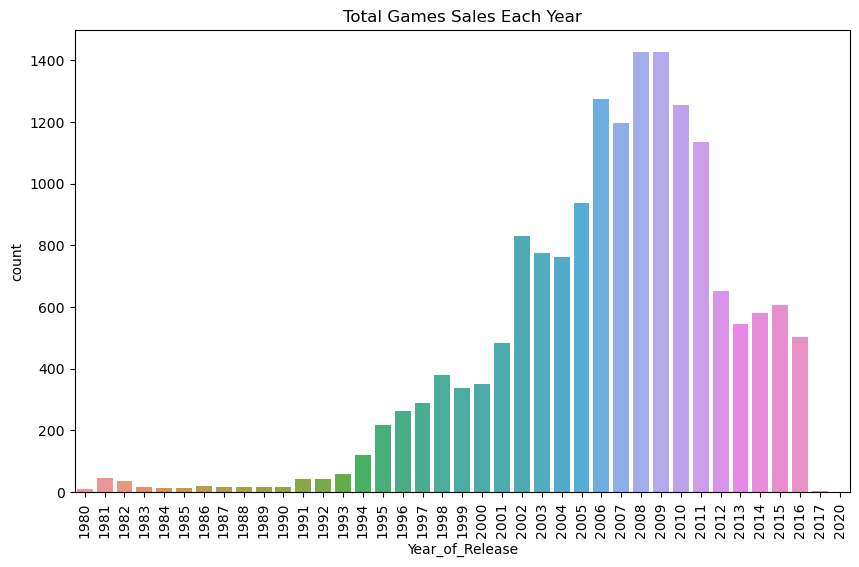

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year_of_Release' column to integer type
dataset['Year_of_Release'] = dataset['Year_of_Release'].astype(int)

plt.figure(figsize=(10, 6))
sns.countplot(x='Year_of_Release', data=dataset)
plt.title('Total Games Sales Each Year')
plt.xticks(rotation=90)  # Adjust the rotation of x-axis ticks
plt.show()


C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


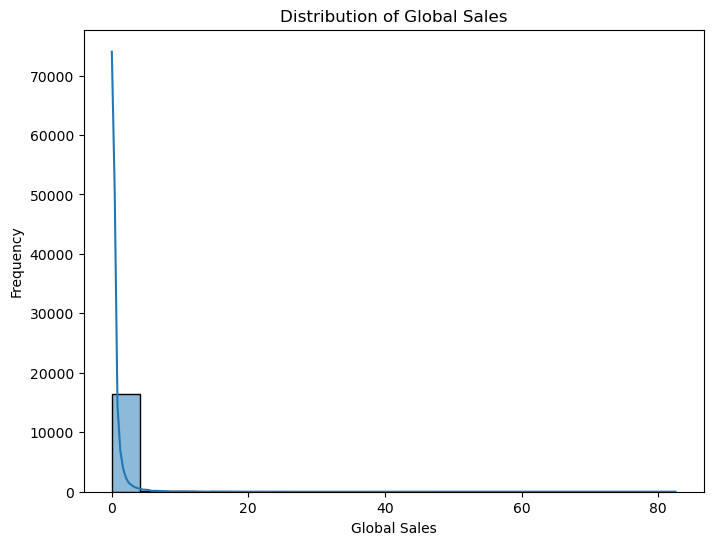

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data visualization
# Histogram of Global_Sales
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Global_Sales'], bins=20, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Wii Sports'

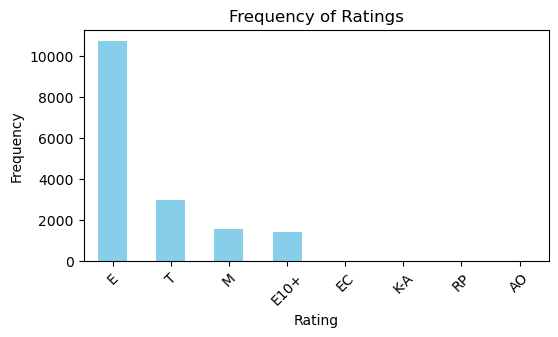

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each rating category
rating_counts = dataset['Rating'].value_counts()

# Plot a bar chart
plt.figure(figsize=(6, 3))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

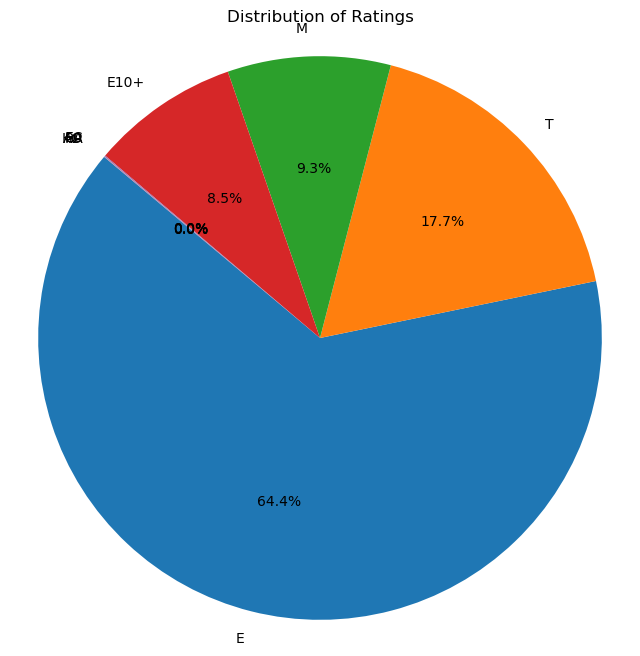

In [16]:
# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()


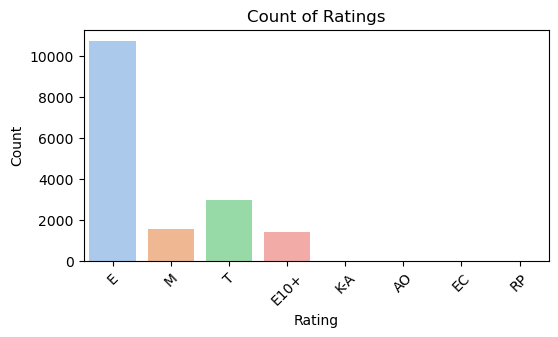

In [17]:

# Plot a count plot
plt.figure(figsize=(6, 3))
sns.countplot(data=dataset, x='Rating', palette='pastel')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


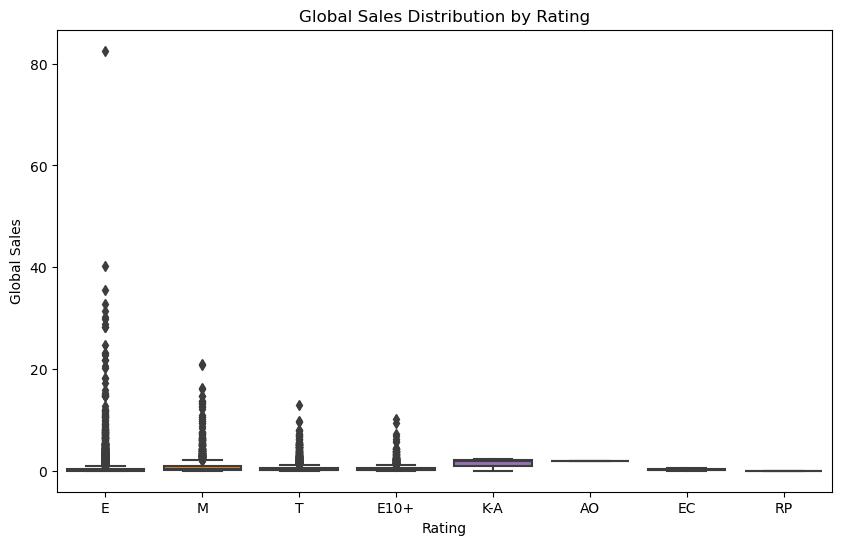

In [18]:
# Plot a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Rating', y='Global_Sales')
plt.title('Global Sales Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Global Sales')
plt.show()


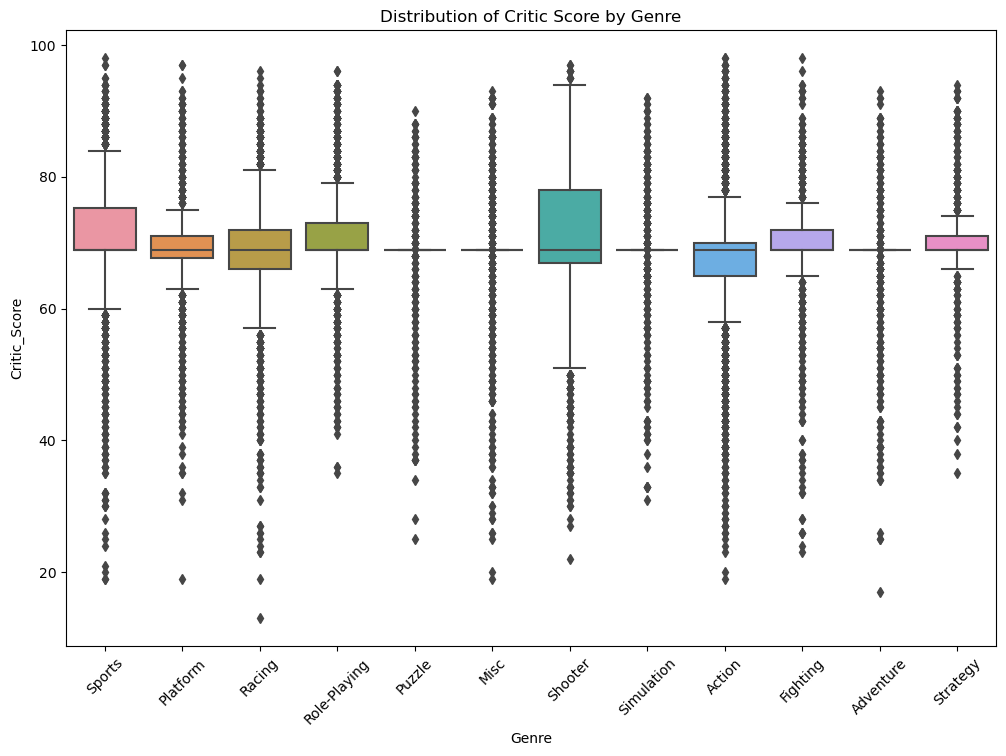

In [19]:
# Feature distribution
# Box plot of Critic_Score by Genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Critic_Score', data=dataset)
plt.title('Distribution of Critic Score by Genre')
plt.xticks(rotation=45)
plt.show()

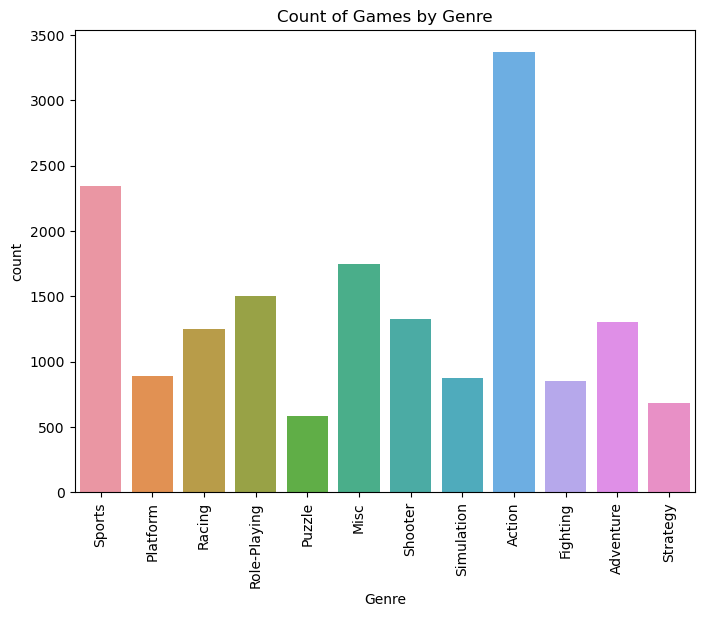

In [20]:
# Categorical variables
# Count plot of Genre
plt.figure(figsize=(8, 6))
sns.countplot(x='Genre', data=dataset)
plt.title('Count of Games by Genre')
plt.xticks(rotation=90)
plt.show()

C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

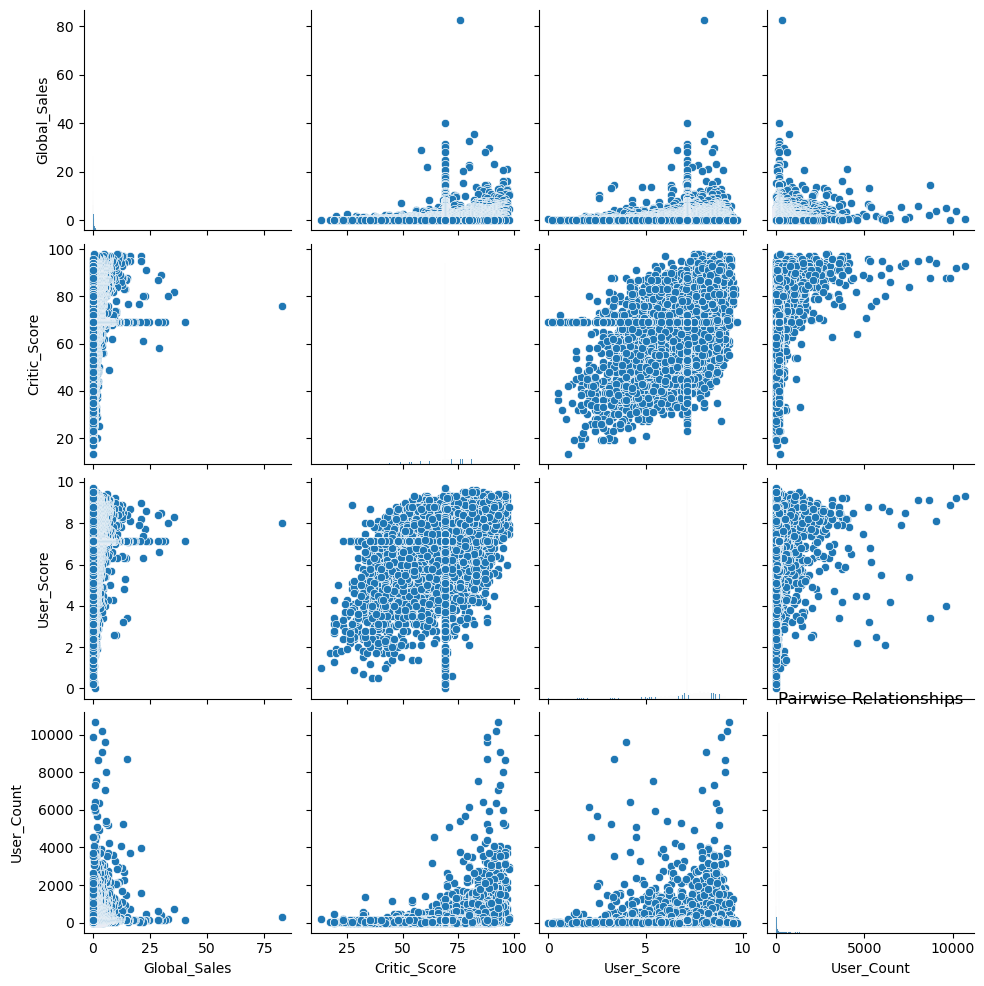

In [21]:
# Pairwise relationships
# Pair plot of numerical variables
sns.pairplot(dataset[['Global_Sales', 'Critic_Score', 'User_Score', 'User_Count']])
plt.title('Pairwise Relationships')
plt.show()

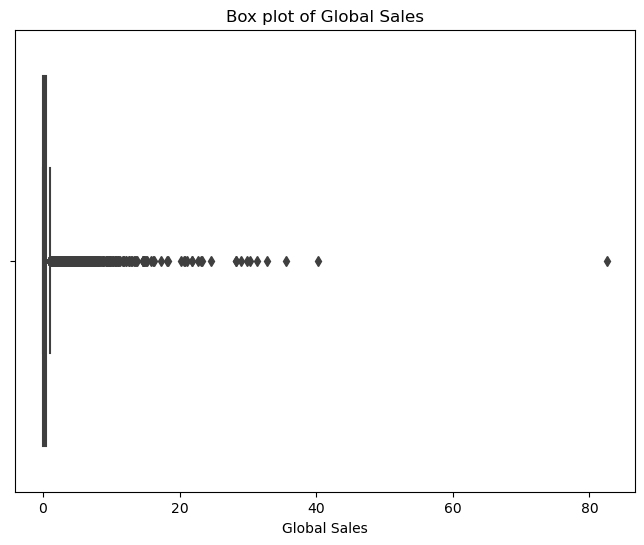

In [22]:
# Outlier detection
# Box plot of Global_Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Global_Sales'])
plt.title('Box plot of Global Sales')
plt.xlabel('Global Sales')
plt.show()

### Encoding categorical variables

Categorical variables are variables which contain label values rather than numeric values.The number of possible values is often limited to a fixed set.

So we are using Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.

In [23]:
#Before Encoding
dataset['Platform']
dataset['Genre']
dataset['Publisher']
dataset['Name']
dataset['Developer']
dataset['Rating']

0        E
1        E
2        E
3        E
4        E
        ..
16714    E
16715    E
16716    E
16717    E
16718    E
Name: Rating, Length: 16717, dtype: object

In [24]:
dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,7.125046,162.229908,Ubisoft,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,7.125046,162.229908,Ubisoft,E


In [25]:
dataset.to_csv('mod_video_games.csv', index=False)


In [26]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.Platform = le.fit_transform(dataset.Platform)
dataset.Genre = le.fit_transform(dataset.Genre)
dataset.Publisher = le.fit_transform(dataset.Publisher)
dataset.Name = le.fit_transform(dataset.Name)
dataset.Developer = le.fit_transform(dataset.Developer)
dataset.Rating = le.fit_transform(dataset.Rating)


In [27]:
# Combine all categorical columns
categorical_columns = ['Platform', 'Genre', 'Publisher', 'Name', 'Developer', 'Rating']
combined_categorical_data = dataset[categorical_columns]

# Initialize LabelEncoder
le = LabelEncoder()

# Fit LabelEncoder on combined categorical data
le.fit(combined_categorical_data.values.ravel())

# Now transform each individual column
for column in categorical_columns:
    dataset[column] = le.transform(dataset[column])

In [28]:
dataset

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,11075,26,2006,10,361,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,1020,1
1,9389,11,1985,4,361,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,7.125046,162.229908,1539,1
2,5613,26,2008,6,361,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,1020,1
3,11077,26,2009,10,361,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,1020,1
4,7392,5,1996,7,361,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,7.125046,162.229908,1539,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,8343,17,2016,0,503,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,162.229908,1539,1
16715,5160,28,2006,10,91,0.00,0.01,0.00,0.00,0.01,68.967679,26.360821,7.125046,162.229908,1539,1
16716,3890,20,2016,1,233,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,162.229908,1539,1
16717,9028,6,2003,4,549,0.01,0.00,0.00,0.00,0.01,68.967679,26.360821,7.125046,162.229908,1539,1


In [29]:
#After encoding or converting categorical col values into numbers
dataset['Platform'].unique()

array([26, 11,  5,  4, 28, 17, 16, 23,  6, 18,  2, 10, 15, 29, 13,  0, 19,
       30, 27,  7,  8,  3, 20, 21, 22, 25, 12, 24,  1,  9, 14],
      dtype=int64)

In [30]:
dataset['Genre'].unique()

array([10,  4,  6,  7,  5,  3,  8,  9,  0,  2,  1, 11], dtype=int64)

In [31]:
dataset['Name'].unique()

array([11075,  9389,  5613, ..., 11169,  5160,  3890], dtype=int64)

In [32]:
dataset['Developer'].unique()

array([1020, 1539,  617, ...,  190,  131,  740], dtype=int64)

In [33]:
dataset['Rating'].unique()

array([1, 5, 7, 2, 4, 0, 3, 6], dtype=int64)

In [34]:
dataset['Publisher'].unique()

array([361, 325, 497, 458,  21, 528,  66, 139, 448, 469,  53,   6,  85,
       178, 277, 467, 460, 545, 290, 552, 532, 138, 428, 548, 145, 349,
       387, 217, 491, 165,  17, 294, 127,  91, 298, 426, 283,  40, 327,
       255, 121, 345,  10, 525, 393, 310, 240, 503,  13, 537, 332, 244,
       533, 465, 536,  63, 222, 110,  23, 380, 427, 542, 201, 202, 555,
       209, 101, 227,  94, 432, 489,  12,  18, 570, 462,   4, 350, 421,
        30,  71, 463, 161, 374, 569, 415,  88, 143, 476,  97, 436,  55,
       305, 453, 494,  27, 324, 402, 177, 515, 443, 275, 183, 512, 301,
       194, 336,  84, 499, 104, 468, 579, 400, 438, 416, 422, 529, 248,
       445, 343,  87, 466,   2, 226, 316, 367,  58,  67, 369, 517, 464,
       364, 459, 258, 279, 417, 236, 510, 434, 320, 307, 230, 171, 435,
       531, 196, 557,  61, 383, 519, 562, 281, 495, 235, 265, 147, 241,
        83, 485,  44, 123, 187, 326, 257,  36, 385, 558, 423, 530, 216,
        22, 561, 549, 505, 370, 149,  60, 185, 274, 507, 306, 13

In [35]:
dataset = dataset.drop(['Name'], axis=1)

## Sales Prediction Model

•	We are going to select a regression algorithms and train models to predict global sales.

•	Then perform feature selection or engineering based on insights from EDA.

•	And evaluate model performance using relevant metrics and compare different algorithms

Here are the step we are taking-->
   First we will spearate the target variable and feature columns in two different dataframe, then will check the shape of the dataset for validation purpose.
   
  Secondly we will split dataset into train and test dataset.
  
  Third we will do scaling on train dataset.

In [36]:
# Separate the target and feature column in X and y variable

target = 'Global_Sales'

# X will be the features
X = dataset.drop(target,axis=1)

#y will be the target variable
y = dataset[target]

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16717 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16717 non-null  int64  
 1   Year_of_Release  16717 non-null  int32  
 2   Genre            16717 non-null  int64  
 3   Publisher        16717 non-null  int64  
 4   NA_Sales         16717 non-null  float64
 5   EU_Sales         16717 non-null  float64
 6   JP_Sales         16717 non-null  float64
 7   Other_Sales      16717 non-null  float64
 8   Critic_Score     16717 non-null  float64
 9   Critic_Count     16717 non-null  float64
 10  User_Score       16717 non-null  float64
 11  User_Count       16717 non-null  float64
 12  Developer        16717 non-null  int64  
 13  Rating           16717 non-null  int64  
dtypes: float64(8), int32(1), int64(5)
memory usage: 1.8 MB


In [38]:
y

0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
16714     0.01
16715     0.01
16716     0.01
16717     0.01
16718     0.01
Name: Global_Sales, Length: 16717, dtype: float64

In [39]:
# Check the shape of X and y variable
X.shape, y.shape

((16717, 14), (16717,))

In [40]:
# Lets reshape the y variable
y = y.values.reshape(-1,1)

In [41]:
# Then check the shape of X and y variable again
X.shape, y.shape

((16717, 14), (16717, 1))

Next we will split the dataset in training and testing data. We are spliting our dataset into 80/20 percentage where 80% dataset will go into the training part and the remaining 20% goes into testing part.

In [42]:
# split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13373, 14), (3344, 14), (13373, 1), (3344, 1))

Train test split technique was used to estimate the performance of the machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allows you to compare the performance of machine learning algorithms for your predictive modeling problem.

Next we will train our model on the basis of our training and testing data.

## Model Training (Regressor Selection )

Algorithms we are using in this step are:

1.Linear Regression.

2.Lasso Regression.

3.Random Forest Regresser.

In [44]:
from sklearn.model_selection import KFold

# we will define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability of predicting new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset.

## 1. Linear Regression
Linear regression is a statistical method used to model the relationship between a dependent variable (also known as the response or target variable) and one or more independent variables (also known as predictors or features). It assumes a linear relationship between the independent variables and the dependent variable, hence the name "linear" regression.


In [45]:
dataset['Year_of_Release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

In [46]:
# Check Data Types
print(dataset.dtypes)

Platform             int64
Year_of_Release      int32
Genre                int64
Publisher            int64
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer            int64
Rating               int64
dtype: object


In [47]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9999933948089227

In [48]:
#Accuracy check of trainig data
from sklearn.metrics import r2_score

#Get R2 score
model.score(X_train, y_train)

0.9999861986545688

In [49]:
#Accuracy of test data
model.score(X_test, y_test)

0.9999933948089227

In [50]:
# Then we have to get the kfold values
from sklearn.model_selection import cross_val_score

lg_scores = -1 * cross_val_score(model,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.00514676, 0.00515352, 0.00509395, 0.00517491, 0.00530942,
       0.00538541, 0.00524027, 0.00500705, 0.00537372, 0.00521237])

In [51]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

0.00520973667231091

### Prediction
we will perform prediction on the dataset.

In [52]:
# Predict the values on X_test_scaled dataset
y_predicted = model.predict(X_test)

Then we will evaluate their performance using metrics such as accuracy, precision, recall, and F1-score

In [53]:
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score

print("The model in use is Linear Regression")
rg = r2_score(y_test,y_predicted)*100
print("The accuracy is: {}".format(rg))

The model in use is Linear Regression
The accuracy is: 99.99933948089227


## 2. Lasso Regression
Lasso Regression, short for Least Absolute Shrinkage and Selection Operator Regression, is a type of linear regression that adds a penalty term to the ordinary least squares (OLS) objective function. This penalty term is the absolute sum of the coefficients multiplied by a constant alpha (λ).

Mathematically, the objective function of Lasso Regression can be expressed as:

minimize: RSS + λ * Σ|βi|

In [54]:
#Using the Lasso Regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

In [55]:
#looking for training data
clf.fit(X_train,y_train)

Lasso(alpha=0.1)

In [56]:
#Accuracy check for the training data
clf.score(X_train,y_train)

0.9271293847537001

In [57]:
y_predicted1 = clf.predict(X_test)

In [58]:
#Accuracy check of the test data
lg = r2_score(y_test,y_predicted1)*100
lg

95.78656825965871

In [59]:
#Get the kfold values
Nn_scores = -1 * cross_val_score(clf,
                                    X_train,
                                    y_train,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error')
Nn_scores

array([0.29814642, 0.51853526, 0.43457191, 0.43999866, 0.37813664,
       0.23497508, 0.38259041, 0.37839371, 0.32069777, 0.40874434])

In [60]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

0.37947901991274624

In [61]:
print("The model used is Lasso Regression")
lg = r2_score(y_test,y_predicted)*100
print("The accuracy is: {}".format(lg))

The model used is Lasso Regression
The accuracy is: 99.99933948089227


## 3. Random Forest Regressor

Random Forest Regressor is a machine learning algorithm used for regression tasks, which involves predicting a continuous numerical value. It belongs to the ensemble learning methods and is based on the Random Forest algorithm, which is an ensemble of decision trees.

In [62]:
#Using Ridge Regression
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

C:\Users\Owner\AppData\Local\Temp\ipykernel_15216\1906769137.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=0)

In [63]:
#Accuracy check of trainig data R2 score
regr.score(X_train, y_train)

0.8525529519119347

In [64]:
# Get the kfold values
Dta_scores = -1 * cross_val_score(regr,
                                    X_train,
                                    y_train,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error')
Dta_scores

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

array([0.5225313 , 0.67779939, 0.77273794, 0.59317113, 0.62865814,
       0.46751139, 0.52797015, 0.53186865, 0.49734137, 0.52341713])

In [65]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.5743006598313456

In [66]:
# predict the values on X_test_scaled dataset
y_predicted = regr.predict(X_test)

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix


print("The model used is Random forest Regressor")

r_acc = r2_score(y_test, y_predicted)*100
print("The accuracy is {}".format(r_acc))

The model used is Random forest Regressor
The accuracy is 68.50465215450794


In [68]:
# Insight
cal_metric=pd.DataFrame([rg,lg,r_acc],columns=["Global_Sales"])
cal_metric.index=['Linear Regression',
                  'Lasso Regression','Random forest Regressor']
cal_metric

,Global_Sales
Linear Regression,99.999339
Lasso Regression,99.999339
Random forest Regressor,68.504652


The Linear Regression and Lasso Regression have very high accuracy scores, close to 100%, this suggest that they are performing exceptionally well according to the metric. On the other hand, the Random Forest Regressor has a lower accuracy score, around 68.5%, indicating slightly lower performance compared to the other two models according to this metric.

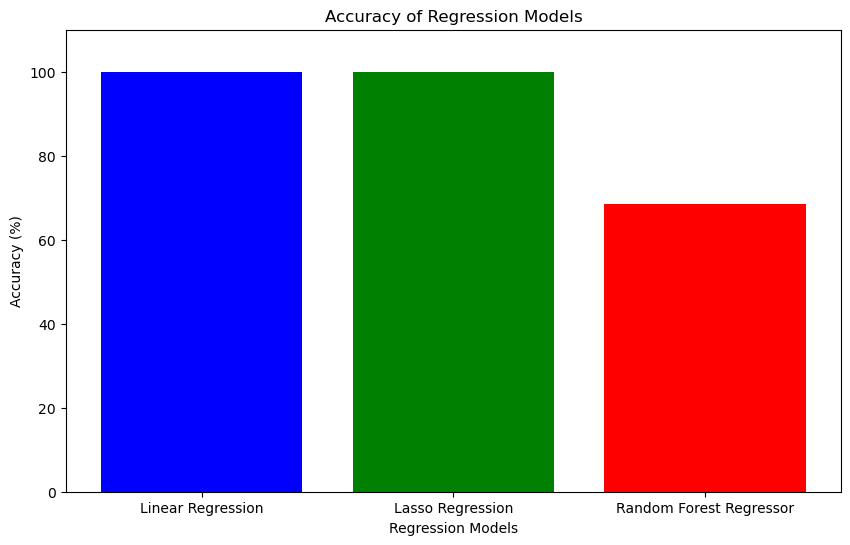

In [69]:
import matplotlib.pyplot as plt

# Define the models and their accuracy scores
models = ['Linear Regression', 'Lasso Regression', 'Random Forest Regressor']
accuracy_scores = [99.999339, 99.999339, 68.504652]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Regression Models')
plt.ylim(0, 110)  # Set y-axis limit to ensure proper visualization
plt.show()


##  Classification Task

In [70]:
import numpy as np

# Define thresholds for categorizing sales
low_sales_threshold = 1  # Define your threshold for low sales
high_sales_threshold = 5  # Define your threshold for high sales

# Function to categorize sales based on thresholds
def categorize_sales(sales):
    if sales <= low_sales_threshold:
        return "low sales"
    elif sales <= high_sales_threshold:
        return "medium sales"
    else:
        return "high sales"

# Apply the categorization function to the Global_Sales column
dataset['Sales_Category'] = dataset['Global_Sales'].apply(categorize_sales)

In [71]:
dataset["Sales_Category"].value_counts()

Sales_Category
low sales       14661
medium sales     1849
high sales        207
Name: count, dtype: int64

In [72]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.sparse import hstack
# Applying Synthetic Minority Oversampling Technique
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline
oer_strategy = {"low sales":15000,
                "medium sales":15000,
                "high sales":30000}
over = SMOTE(sampling_strategy=oer_strategy)

#und_strategy = {}
#under = RandomUnderSampler(sampling_strategy=und_strategy)

steps = [('over', over)]
pipeline = Pipeline(steps=steps)

# Separate the target and feature column in X and y variable
target = 'Sales_Category'
not_needed = ["Sales_Category", "Global_Sales"]

# X will be the features
X = dataset.drop(not_needed,axis=1)
#y will be the target variable
y = dataset[target]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#summarize class distribution
counter = Counter(y_train)
print(counter)

# transform the dataset using sampling pipeline
X_train, y_train = pipeline.fit_resample(X_train, y_train)

# summarize new class distibution
counter = Counter(y_train)
print(counter)


# Perform one-hot encoding on categorical features
cat_cols = ["Platform",	"Genre", "Publisher", "Developer", "Rating"]
encoder = OneHotEncoder(handle_unknown='ignore')  # Handle unknown categories by ignoring them

X_train_cat_encoded = encoder.fit_transform(X_train[cat_cols])
X_test_cat_encoded = encoder.transform(X_test[cat_cols])

# Drop categorical columns from X_train and X_test
X_train_numeric = X_train.drop(columns=cat_cols)
X_test_numeric = X_test.drop(columns=cat_cols)

X_train_encoded = hstack((X_train_numeric.values, X_train_cat_encoded))
X_test_encoded = hstack((X_test_numeric.values, X_test_cat_encoded))


# Initialize and train the classification model (Random Forest)
model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_encoded)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Counter({'low sales': 11714, 'medium sales': 1498, 'high sales': 161})
Counter({'high sales': 30000, 'low sales': 15000, 'medium sales': 15000})
Accuracy: 0.9742822966507177
Precision: 0.975759233005968
Recall: 0.9742822966507177
F1-score: 0.9747935028310711


In [73]:

X_train_encoded.shape, X_test_encoded.shape, y_train.shape, y_test.shape

((60000, 2335), (3344, 2335), (60000,), (3344,))

In [74]:
y_train



0           low sales
1           low sales
2           low sales
3           low sales
4           low sales
             ...     
59995    medium sales
59996    medium sales
59997    medium sales
59998    medium sales
59999    medium sales
Name: Sales_Category, Length: 60000, dtype: object

## Model Evaluation

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize the model
model = RandomForestClassifier()

# Cross-validation
cv_scores = cross_val_score(model, X_train_encoded, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Train the model
model.fit(X_train_encoded, y_train)

# Predictions
y_pred_train = model.predict(X_train_encoded)
y_pred_test = model.predict(X_test_encoded)

# Performance Metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Cross-Validation Scores: [0.9935     0.99491667 0.99383333 0.99483333 0.99283333]
Mean CV Score: 0.9939833333333332
Train Accuracy: 1.0
Test Accuracy: 0.9766746411483254
Precision: 0.9782280000923709
Recall: 0.9766746411483254
F1-score: 0.9771582505891038


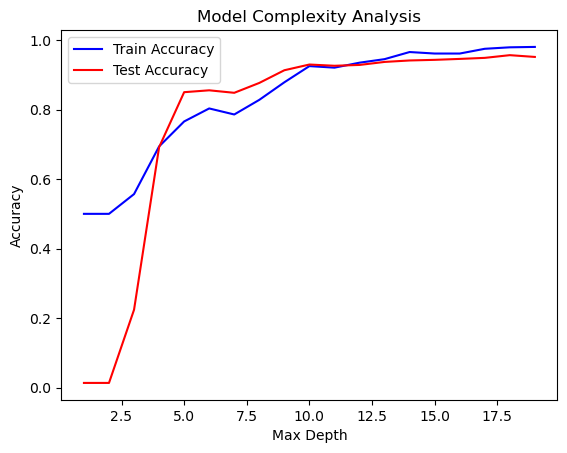

In [76]:
# Model Complexity Analysis
max_depths = range(1, 20)
train_scores = []
test_scores = []

for depth in max_depths:
    model = RandomForestClassifier(max_depth=depth)
    model.fit(X_train_encoded, y_train)
    train_scores.append(model.score(X_train_encoded, y_train))
    test_scores.append(model.score(X_test_encoded, y_test))

# Visualization
plt.plot(max_depths, train_scores, 'b', label='Train Accuracy')
plt.plot(max_depths, test_scores, 'r', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Complexity Analysis')
plt.legend()
plt.show()


In [77]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [78]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_pred_test)
conf_mx

array([[  39,    0,    7],
       [   0, 2896,   51],
       [   4,   16,  331]], dtype=int64)

## Model Deployment and Hosting

Next we are going to save the model for deployment and hosting in pickel format file.

In [79]:
import pickle

model_path = "classification_model.pkl"

# save the label encoder
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

In [80]:
encoder_path = "encoder.pkl"

# save the label encoder
with open(encoder_path, 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

In [81]:
reg_path = "regression_model.pkl"

# save the label encoder
with open(reg_path, 'wb') as reg_file:
    pickle.dump(clf, reg_file)

In [82]:
label_path = "label_encoder.pkl"

# save the label encoder
with open(label_path, 'wb') as label_file:
    pickle.dump(le, label_file)

In [84]:
X_train_encoded

<60000x2335 sparse matrix of type '<class 'numpy.float64'>'
	with 809384 stored elements in COOrdinate format>

In [85]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate some example classification data
#X_classification, y_classification = make_classification(n_samples=100, n_features=14, n_classes=3, random_state=42)

# Initialize and train your classification model
model_classification = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, min_samples_split=2, random_state=42)
model_classification.fit(X_train_encoded, y_train)

# Specify the file path where you want to save the pickled model
file_path_classification = 'model_classification.pkl'

# Save the trained classification model to a file using pickle
with open(file_path_classification, 'wb') as f:
    pickle.dump(model_classification, f)

print(f"Classification Model saved to {file_path_classification}")


Classification Model saved to model_classification.pkl


In [ ]:
import pickle
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# Generate some example data
#X, y = make_regression(n_samples=100, n_features=14, noise=0.1, random_state=42)

# Initialize and train your model
#model = Lasso(alpha=0.1)
#model.fit(X, y)

# Specify the file path where you want to save the pickled model
#file_path = 'regression_model.pkl'

# Save the trained model to a file using pickle
#with open(file_path, 'wb') as f:
#    pickle.dump(model, f)

#print(f"Model saved to {file_path}")


In [ ]:
import pickle

# Specify the file path from which you want to load the pickled model
#file_path = 'model_regression.pkl'

# Load the pickled model from the file
#with open(file_path, 'rb') as f:
#    loaded_model = pickle.load(f)

#print("Model loaded successfully")

# load the pickled label encoder from file
#with open("encoder.pkl", "rb") as fenc:
#    loaded_pickle = pickle.load(fenc)

#print("encoder loaded succesfully")

In [ ]:
# Save the modified dataset to a new CSV file
dataset.to_csv('modified_video_games.csv', index=False)
